# Two line logging in ML Flow
`import mlflow
mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True)
!mlflow ui`

# Ridge regression on example of boston data without mlflow

In [4]:
mlflow.sklearn.autolog(disable=True)

In [5]:
%%timeit -n 10 #-o
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd

# Load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model, get predictions
reg = Ridge()
reg.fit(X, y)
y_pred = reg.predict(X_test)


16.4 ms ± 4.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Ridge regression on example of boston data with mlflow

In [6]:
mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True)

In [7]:
%%timeit -n 10 #-o
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd

# Load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model, get predictions
reg = Ridge()
reg.fit(X, y)
y_pred = reg.predict(X_test)

89 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
#!mlflow ui

# Binary classification using Random Forest on the example of iris data without mlflow

In [9]:
mlflow.sklearn.autolog(disable=True)
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from numpy.random.mtrand import permutation
from sklearn.datasets import load_iris
import scikitplot

In [10]:
%%timeit -n 10 #-o

# load data
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names
features = iris.feature_names

#y[y != 0] = 1

# shuffle data
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# create model
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)


#scikitplot.metrics.plot_roc(y_test, y_probas);
#scikitplot.metrics.plot_precision_recall(y_test, y_probas);

216 ms ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Binary classification using Random Forest on the example of iris data with mlflow

In [11]:
mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True)

In [12]:
%%timeit -n 10 #-o
# load data
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names
features = iris.feature_names

y[y != 0] = 1.0

# shuffle data
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# create model
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)

#scikitplot.metrics.plot_roc(y_test, y_probas);
#scikitplot.metrics.plot_precision_recall(y_test, y_probas);

932 ms ± 239 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
#!mlflow ui

# Clustering with KMeans
## using iris data without mlflow without autologging: metrics weren't being saved
(can add also DBSCAN, AgglomerativeClustering)

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import datasets, cluster
from sklearn.datasets import load_iris
import numpy as np
import mlflow.sklearn
mlflow.sklearn.autolog(disable=True)
import scikitplot


In [15]:
%%timeit -n 10 #-o
iris = datasets.load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=4, random_state=21)

cluster_labels = kmeans.fit_predict(X)

#scikitplot.cluster.plot_elbow_curve(kmeans, X)
#scikitplot.metrics.plot_silhouette(X, cluster_labels)

42.8 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Clustering with KMeans 
## using iris data with mlflow without autologging: metrics weren't being saved
(can add also DBSCAN, AgglomerativeClustering)

In [16]:
 #mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True)

In [17]:
%%timeit -n 10 #-o
iris = datasets.load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=4, random_state=21)
params = kmeans.get_params()

with mlflow.start_run() as run:
    cluster_labels = kmeans.fit_predict(X)
    mlflow.log_params(params)
    mlflow.sklearn.log_model(cluster_labels, artifact_path="model1")
    mlflow.log_metric("score", kmeans.score(X), step=None)

    #scikitplot.cluster.plot_elbow_curve(kmeans, X)
    #scikitplot.metrics.plot_silhouette(X, cluster_labels)
    
    # Log artifacts (output files) #save plt and then save as artifact.. can't be done directly
    #mlflow.log_artifact("elbow.png")

88.9 ms ± 4.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
#!mlflow ui

# SVM on iris data without mlflow

In [19]:
mlflow.sklearn.autolog(disable=True)
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn

17.1 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


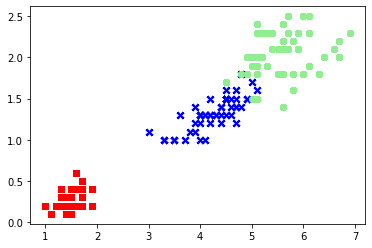

In [20]:
%%timeit -n 10 #-o

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Fit model
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
svm.fit(X_train_std, y_train)

# Create a matplotlib custom plot to save 
def plot_data():
    from matplotlib.colors import ListedColormap
    import matplotlib.pyplot as plt

    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)


plot_data()

#### get the whole list of the parameters for the run for the estimator (if we are not logging it inside the loop)param_config = svm.get_params()
#param_config


# SVM on iris data with mlflow

In [21]:
mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True)
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn

253 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


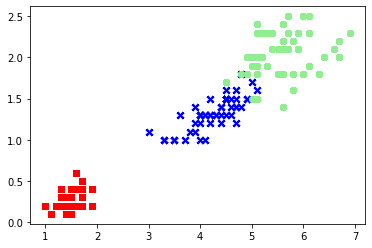

In [22]:
%%timeit -n 10 #-o


iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Fit model
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
svm.fit(X_train_std, y_train)

# Create a matplotlib custom plot to save 
def plot_data():
    from matplotlib.colors import ListedColormap
    import matplotlib.pyplot as plt

    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)


plot_data()

#### get the whole list of the parameters for the run for the estimator (if we are not logging it inside the loop)param_config = svm.get_params()
#param_config


In [23]:
#!mlflow ui

In [24]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from itertools import cycle, islice
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model as lm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge


# Pulsar stars detection: clustering, classification, ridge regression with mlflow

In [25]:
mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True)

In [ ]:
# Load data
pulsar = pd.read_csv('data/pulsar_stars.csv')

# Get numeric labels for each of the string labels, to make them compatible with our model
labels_to_class = {'Pulsar': 0, 'Not a Pulsar': 1}
def get_class_ids(labels):
    return np.array([labels_to_class[alabel] for alabel in labels])
def get_named_labels(labels, numeric_labels):
        return np.array([labels[num_label] for num_label in numeric_labels])

# Remove target variables label (and class)
features = list(set(pulsar.columns) - {'target_class'})
X = pulsar[features]
y = pulsar['target_class']
labels = ['Pulsar', 'Not a Pulsar']
X = X[:50000]
y = y[:50000]

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(X)
# Split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Clustering - predict particle clusters without labels
# KMeans
kmeans = KMeans(n_clusters=2, random_state=1)
cluster_labels = kmeans.fit_predict(X_train)
label_names = get_named_labels(labels, cluster_labels)

# Classification - predict pulsar
# Train a model, get predictions
log = lm.LogisticRegression(random_state=4)
knn = KNeighborsClassifier(n_neighbors=2)
dtree = DecisionTreeClassifier(random_state=4)
rtree = RandomForestClassifier(n_estimators=100, random_state=4)
svm = SVC(random_state=4, probability=True)
nb = GaussianNB()
gbc = GradientBoostingClassifier()
adaboost = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=42,
                             base_estimator=DecisionTreeClassifier(max_depth=8,
                             min_samples_leaf=10, random_state=42))

def model_algorithm(clf, X_train, y_train, X_test, y_test, name, labels, features):
    clf.fit(X_train, y_train)
    y_probas = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)

model_algorithm(log, X_train, y_train, X_test, y_test, 'LogisticRegression', labels, features)
model_algorithm(knn, X_train, y_train, X_test, y_test, 'KNearestNeighbor', labels, features)
model_algorithm(dtree, X_train, y_train, X_test, y_test, 'DecisionTree', labels, features)
model_algorithm(rtree, X_train, y_train, X_test, y_test, 'RandomForest', labels, features)
model_algorithm(svm, X_train, y_train, X_test, y_test, 'SVM', labels, features)
model_algorithm(nb, X_train, y_train, X_test, y_test, 'NaiveBayes', labels, features)
model_algorithm(adaboost, X_train, y_train, X_test, y_test, 'AdaBoost', labels, features)
model_algorithm(gbc, X_train, y_train, X_test, y_test, 'GradientBoosting', labels, features)

# Regression - TrackP - particle momentum
features = list(set(pulsar.columns) - {' Mean of the integrated profile'})
X = pulsar[features]
y = pulsar[' Mean of the integrated profile']
X = X[:10000]
y = y[:10000]

# Split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.90, test_size=0.10)

# Train a model, get predictions
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Titanic data: clustering, classification and regression

In [ ]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from itertools import cycle, islice
from sklearn.neighbors import BallTree, KDTree, DistanceMetric
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model as lm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Load data
pulsar = pd.read_csv('/data/titanic-train.csv')

# Get numeric labels for each of the string labels, to make them compatible with our model
labels_to_class = {'Did not Survive': 0, 'Survived': 1}
def get_class_ids(labels):
    return np.array([labels_to_class[alabel] for alabel in labels])
def get_named_labels(labels, numeric_labels):
        return np.array([labels[num_label] for num_label in numeric_labels])

# Remove target variables label (and class)
features = list(set(pulsar.columns) - {'Survived','Name'})
X = pulsar[features]
y = pulsar['Survived']
labels = ['Did not Survive', 'Survived']
X = X[:50000]
X = X.replace("", np.nan, regex = True)
y = y[:50000]

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(X)
# Split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Clustering - predict particle clusters without labels
# KMeans
kmeans = KMeans(n_clusters=2, random_state=1)
cluster_labels = kmeans.fit_predict(X_train)
label_names = get_named_labels(labels, cluster_labels)

# Classification - predict pulsar
# Train a model, get predictions
log = lm.LogisticRegression(random_state=4)
knn = KNeighborsClassifier(n_neighbors=2)
dtree = DecisionTreeClassifier(random_state=4)
rtree = RandomForestClassifier(n_estimators=100, random_state=4)
svm = SVC(random_state=4, probability=True)
nb = GaussianNB()
gbc = GradientBoostingClassifier()
adaboost = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=42,
                             base_estimator=DecisionTreeClassifier(max_depth=8,
                             min_samples_leaf=10, random_state=42))

def model_algorithm(clf, X_train, y_train, X_test, y_test, name, labels, features):
    clf.fit(X_train, y_train)
    y_probas = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)

model_algorithm(log, X_train, y_train, X_test, y_test, 'LogisticRegression', labels, features)
model_algorithm(knn, X_train, y_train, X_test, y_test, 'KNearestNeighbor', labels, features)
model_algorithm(dtree, X_train, y_train, X_test, y_test, 'DecisionTree', labels, features)
model_algorithm(rtree, X_train, y_train, X_test, y_test, 'RandomForest', labels, features)
model_algorithm(svm, X_train, y_train, X_test, y_test, 'SVM', labels, features)
model_algorithm(nb, X_train, y_train, X_test, y_test, 'NaiveBayes', labels, features)
model_algorithm(adaboost, X_train, y_train, X_test, y_test, 'AdaBoost', labels, features)
model_algorithm(gbc, X_train, y_train, X_test, y_test, 'GradientBoosting', labels, features)

# Regression - TrackP - particle momentum
features = list(set(pulsar.columns) - {'Age'})
X = pulsar[features]
y = pulsar['Age']
X = X[:10000]
y = y[:10000]

# Split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.90, test_size=0.10)

# Train a model, get predictions
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)



# Naive Bayes Classifier on tweets data

In [ ]:
import pandas as pd
import numpy as np
import scikitplot
        
def plot(nb, X_test, y_test, y_probas, y_pred):
        scikitplot.estimators.plot_learning_curve(nb, X_test, y_test)
        scikitplot.metrics.plot_roc(y_test, y_probas)
        scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, labels=nb.classes_)
        scikitplot.metrics.plot_precision_recall(y_test, y_probas)


def tweets():

    # Get a pandas DataFrame object of all the data in the csv file:
    df = pd.read_csv('data/tweets.csv')

    # Get pandas Series object of the "tweet text" column:
    text = df['tweet_text']

    # Get pandas Series object of the "emotion" column:
    target = df['is_there_an_emotion_directed_at_a_brand_or_product']

    # Remove the blank rows from the series:
    target = target[pd.notnull(text)]
    text = text[pd.notnull(text)]

    # Perform feature extraction:
    from sklearn.feature_extraction.text import CountVectorizer
    count_vect = CountVectorizer()
    count_vect.fit(text)
    counts = count_vect.transform(text)


    counts_train = counts[:6000]
    target_train = target[:6000]
    counts_test = counts[6000:]
    target_test = target[6000:]


    # Train with this data with a Naive Bayes classifier:
    from sklearn.naive_bayes import MultinomialNB

    nb = MultinomialNB()
    nb.fit(counts, target)


    X_test = counts_test
    y_test = target_test
    y_probas = nb.predict_proba(X_test)
    y_pred = nb.predict(X_test)

    #print("y", y_probas.shape)
    #plot(nb, X_test, y_test, y_probas, y_pred)

# without mlflow

In [ ]:
%%timeit -n 10 #-o
mlflow.sklearn.autolog(disable=True)
tweets()

# with mlflow

In [ ]:
%%timeit -n 10 #-o
mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True)
tweets()

In [ ]:
#!mlflow ui